In [1]:
import tensorflow as tf

In [2]:
from keras.layers import Dense, Dropout, InputLayer
from keras import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
import numpy as np
import seaborn as sb
import pandas as pd

In [5]:
import pickle

In [6]:
eeg_dataset_path = './Dataset/EEG_data.csv'
demo_dataset_path = './Dataset/demographic_info.csv'

In [7]:
eeg_dataset = pd.read_csv(eeg_dataset_path)
demo_dataset = pd.read_csv(demo_dataset_path)

In [8]:
eeg_dataset.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


<Axes: >

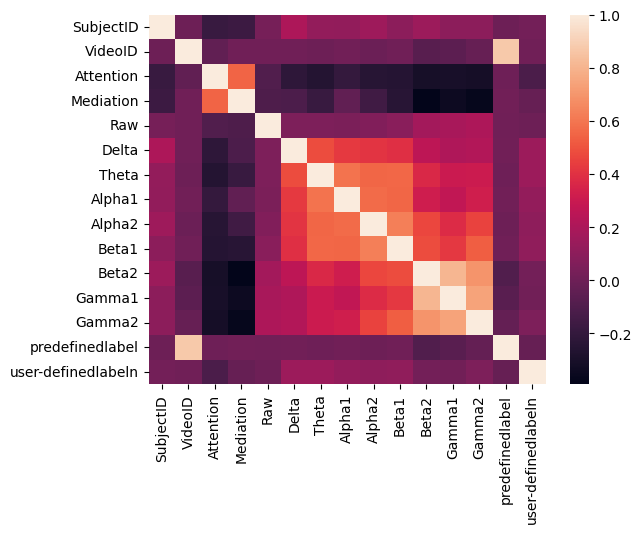

In [9]:
sb.heatmap(eeg_dataset.corr())

The correlation matrix shows that from 'Beta2' to 'Gamma2' values are highly regular (> 0.6) correlated. And from 'Delta' to 'Beta1', there is semi-correlation. They may/may not be dropped. There was no major performance difference.

In [10]:
#eeg_dataset.drop(['predefinedlabel', 'VideoID', 'Beta2', 'Gamma2', 'Alpha1', 'Delta', 'Mediation'], axis=1, inplace=True)
eeg_dataset.drop(['predefinedlabel'], axis=1, inplace=True)

In [11]:
eeg_dataset.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0


In [12]:
demo_dataset.head()

,subject ID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M


In [13]:
demo_dataset.columns

Index(['subject ID', ' age', ' ethnicity', ' gender'], dtype='object')

In [14]:
demo_dataset.rename({'subject ID': 'SubjectID', ' age': 'age', ' ethnicity': 'ethnicity', ' gender': 'gender'}, inplace=True, axis=1)

In [15]:
demo_dataset.drop('ethnicity', axis=1, inplace=True)

In [16]:
demo_dataset['gender'] = np.where(demo_dataset['gender'] == 'M', 0, 1)

In [17]:
demo_dataset.head()

,SubjectID,age,gender
0,0,25,0
1,1,24,0
2,2,31,0
3,3,28,1
4,4,24,0


In [18]:
data = pd.merge(eeg_dataset, demo_dataset, on='SubjectID', how='inner')

In [19]:
data.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,user-definedlabeln,age,gender
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,25,0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,25,0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,25,0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,25,0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,25,0


In [20]:
data.drop('SubjectID', axis=1, inplace=True)

In [21]:
data.rename({'user-definedlabeln': 'Confusion'}, axis=1, inplace=True)

In [22]:
data['Confusion'].value_counts()

Confusion
1.0    6567
0.0    6244
Name: count, dtype: int64

In [23]:
data.head()

,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,Confusion,age,gender
0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,25,0
1,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,25,0
2,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,25,0
3,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,25,0
4,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,25,0


<Axes: >

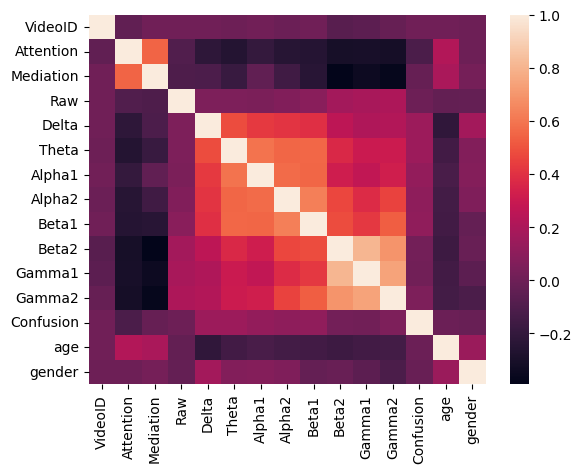

In [24]:
sb.heatmap(data.corr())

In [25]:
data_y = data.pop('Confusion').to_numpy()

In [26]:
sc = StandardScaler()
data_x = sc.fit_transform(data)
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, random_state=42, shuffle=True)

In [27]:
x_train[:5]

array([[ 1.23901546e+00, -1.05018222e+00,  3.00918862e-01,
        -1.39774346e-01,  1.46323349e+00,  7.55344049e-01,
         4.14013500e+00,  2.55618940e-01,  1.76079996e-01,
         2.95962441e-01,  2.84383896e-01, -2.09302587e-01,
        -6.39419831e-01, -5.01560675e-01],
       [-1.34083766e-01,  1.06626107e+00,  6.98180549e-01,
         1.07530778e-02, -9.35110570e-01, -6.51099134e-01,
        -3.82412260e-01, -1.14306030e-01, -2.52340450e-01,
        -1.69729650e-01, -2.52314363e-01, -7.72599888e-02,
         2.53509449e+00, -5.01560675e-01],
       [ 2.09191040e-01, -1.78445846e+00, -2.08265126e+00,
         3.31399376e+00, -2.84651252e-01, -1.12944591e-01,
         2.49111563e-01,  9.52613077e-01, -4.51394168e-02,
         4.70497969e+00,  2.57765054e+00,  2.94934063e+00,
        -6.39419831e-01, -5.01560675e-01],
       [-1.50718299e+00, -1.78445846e+00, -2.08265126e+00,
         6.17880352e-01, -2.81588197e-01,  1.29738420e-01,
        -2.05629771e-01, -2.71701207e-01, -2.

In [28]:
y_train[:5]

array([1., 1., 0., 1., 1.])

ANN

In [29]:
model = Sequential([
    InputLayer(x_train.shape[1]),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.22),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [30]:
model.compile(
    optimizer='adam', loss='binary_crossentropy', metrics='accuracy'
)

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                960       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 1

In [32]:
model_checkpoint = ModelCheckpoint('./Model_Data/Model_test.h5', save_best_only=True, monitor='val_accuracy')
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, verbose=1, restore_best_weights=True)

In [33]:
history = model.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_test, y_test), callbacks=[model_checkpoint, early_stopping])

Epoch 1/200
301/301 [==============================] - 5s 8ms/step - loss: 0.6455 - accuracy: 0.6197 - val_loss: 0.5897 - val_accuracy: 0.6837
Epoch 2/200
301/301 [==============================] - 1s 4ms/step - loss: 0.5999 - accuracy: 0.6767 - val_loss: 0.5692 - val_accuracy: 0.6922
Epoch 3/200
301/301 [==============================] - 1s 4ms/step - loss: 0.5853 - accuracy: 0.6882 - val_loss: 0.5499 - val_accuracy: 0.7034
Epoch 4/200
301/301 [==============================] - 1s 4ms/step - loss: 0.5702 - accuracy: 0.6958 - val_loss: 0.5373 - val_accuracy: 0.7143
Epoch 5/200
301/301 [==============================] - 1s 4ms/step - loss: 0.5624 - accuracy: 0.6985 - val_loss: 0.5194 - val_accuracy: 0.7312
Epoch 6/200
301/301 [==============================] - 1s 4ms/step - loss: 0.5491 - accuracy: 0.7080 - val_loss: 0.5209 - val_accuracy: 0.7337
Epoch 7/200
301/301 [==============================] - 1s 4ms/step - loss: 0.5438 - accuracy: 0.7120 - val_loss: 0.5092 - val_accuracy: 0.7471

In [34]:
final = pd.DataFrame(history.history)

<Axes: >

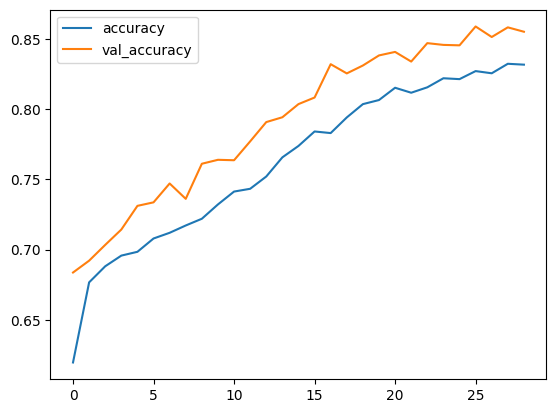

In [35]:
final.loc[:, ['accuracy', 'val_accuracy']].plot()

<Axes: >

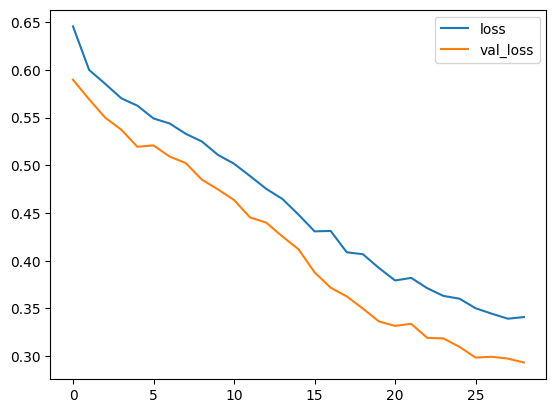

In [36]:
final.loc[:, ['loss', 'val_loss']].plot()

REMARKS: The curve shows that the model is slightly overfit, and early stopping just saved it from going total overfit.

In [37]:
with open('./Model_Data/StandardScaler.pkl', 'wb') as f:
    pickle.dump(sc, f)

Bidirectional LSTMs

In [38]:
from keras.layers import LSTM, Bidirectional

In [39]:
_x_train, _x_test = np.expand_dims(x_train, -1), np.expand_dims(x_test, -1)

In [40]:
_x_train.shape

(9608, 14, 1)

1) Bi-LSTM with 13 time steps and 1 feature

In [50]:
_model = Sequential([
    InputLayer((_x_train.shape[1], _x_train.shape[2])),
    Bidirectional(LSTM(20, return_sequences=True)),
    Bidirectional(LSTM(10)),
    Dense(1, activation='sigmoid')
])

In [51]:
_model.compile(
    optimizer='adam', loss='binary_crossentropy', metrics='accuracy'
)

In [43]:
_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 14, 40)           3520      
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 20)               4080      
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 7,621
Trainable params: 7,621
Non-trainable params: 0
_________________________________________________________________


In [44]:
_model_checkpoint = ModelCheckpoint('./Model_Data/Model_test_blstm.h5', save_best_only=True, monitor='val_accuracy')
_history = _model.fit(_x_train, y_train, epochs=200, batch_size=32, validation_data=(_x_test, y_test), callbacks=[_model_checkpoint, early_stopping])

Epoch 1/200
301/301 [==============================] - 13s 18ms/step - loss: 0.6682 - accuracy: 0.5871 - val_loss: 0.6457 - val_accuracy: 0.6294
Epoch 2/200
301/301 [==============================] - 4s 14ms/step - loss: 0.6347 - accuracy: 0.6417 - val_loss: 0.6361 - val_accuracy: 0.6350
Epoch 3/200
301/301 [==============================] - 4s 15ms/step - loss: 0.6256 - accuracy: 0.6505 - val_loss: 0.6271 - val_accuracy: 0.6406
Epoch 4/200
301/301 [==============================] - 4s 14ms/step - loss: 0.6201 - accuracy: 0.6566 - val_loss: 0.6197 - val_accuracy: 0.6563
Epoch 5/200
301/301 [==============================] - 4s 14ms/step - loss: 0.6087 - accuracy: 0.6649 - val_loss: 0.6086 - val_accuracy: 0.6678
Epoch 6/200
301/301 [==============================] - 4s 15ms/step - loss: 0.5984 - accuracy: 0.6739 - val_loss: 0.6117 - val_accuracy: 0.6638
Epoch 7/200
301/301 [==============================] - 4s 15ms/step - loss: 0.5907 - accuracy: 0.6787 - val_loss: 0.5939 - val_accuracy

In [45]:
_final = pd.DataFrame(_history.history)

<Axes: >

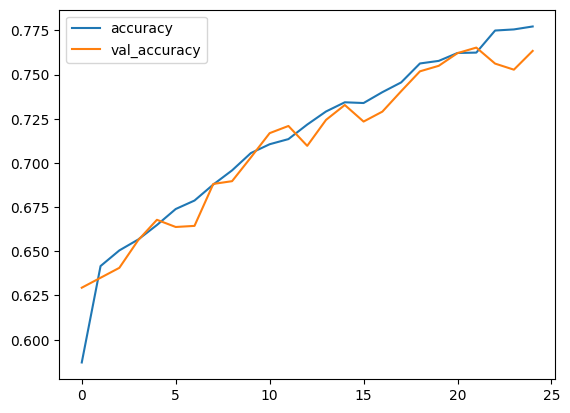

In [46]:
_final.loc[:, ['accuracy', 'val_accuracy']].plot()

<Axes: >

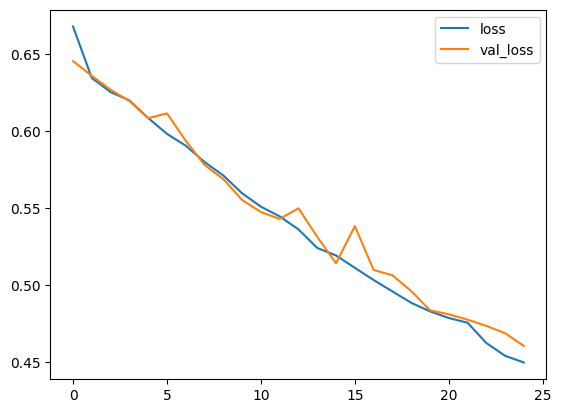

In [47]:
_final.loc[:, ['loss', 'val_loss']].plot()

2) Bi-LSTM with 1 time step and 13 features

In [48]:
_x_train, _x_test = np.expand_dims(x_train, 1), np.expand_dims(x_test, 1)
_x_train.shape

(9608, 1, 14)

In [52]:
_modelcheckpoint = ModelCheckpoint('./Model_Data/Model_test.h5', save_best_only=True, monitor='val_accuracy')
_xhistory = _model.fit(_x_train, y_train, epochs=200, batch_size=32, validation_data=(_x_test, y_test), callbacks=[_modelcheckpoint, early_stopping])

Epoch 1/200
301/301 [==============================] - 8s 15ms/step - loss: 0.6674 - accuracy: 0.5970 - val_loss: 0.6438 - val_accuracy: 0.6332
Epoch 2/200
301/301 [==============================] - 4s 12ms/step - loss: 0.6186 - accuracy: 0.6529 - val_loss: 0.5887 - val_accuracy: 0.6741
Epoch 3/200
301/301 [==============================] - 4s 13ms/step - loss: 0.5785 - accuracy: 0.6821 - val_loss: 0.5626 - val_accuracy: 0.7012
Epoch 4/200
301/301 [==============================] - 4s 13ms/step - loss: 0.5601 - accuracy: 0.6998 - val_loss: 0.5506 - val_accuracy: 0.7131
Epoch 5/200
301/301 [==============================] - 3s 11ms/step - loss: 0.5482 - accuracy: 0.7088 - val_loss: 0.5441 - val_accuracy: 0.7075
Epoch 6/200
301/301 [==============================] - 4s 14ms/step - loss: 0.5394 - accuracy: 0.7081 - val_loss: 0.5330 - val_accuracy: 0.7253
Epoch 7/200
301/301 [==============================] - 4s 12ms/step - loss: 0.5316 - accuracy: 0.7161 - val_loss: 0.5396 - val_accuracy:

In [53]:
_xfinal = pd.DataFrame(_xhistory.history)

<Axes: >

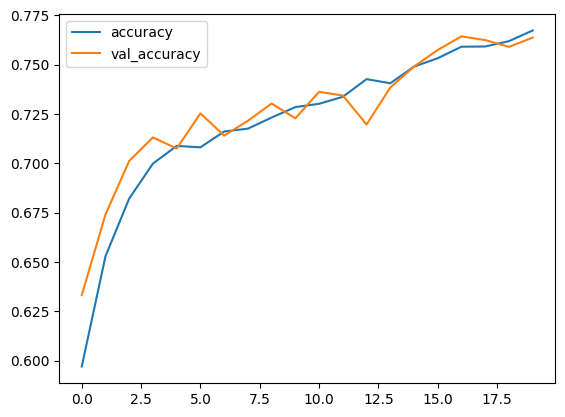

In [54]:
_xfinal.loc[:, ['accuracy', 'val_accuracy']].plot()

<Axes: >

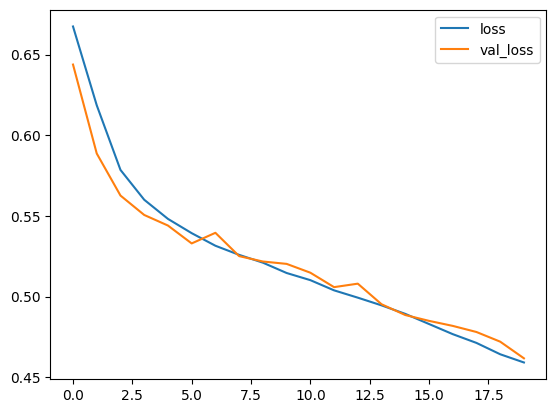

In [55]:
_xfinal.loc[:, ['loss', 'val_loss']].plot()

REMARKS: Both the Bi-LSTMs (irrespective of shape) show overfit curve (model cannot be used for deployment purposes)

Machine learning algorithms like SVM, Decision Trees and Random Forest cannot be used as the final estimation is to get a rough value of the outcome (from 0 to 1) [which can be converted to percentage (* 100)] and not a definite binary value (0 and 1).

Overall REMARK:
The EEG dataset is tricky and really hard to predict precise values. The following graphs indicates that the data collected from EEG is highly left inclined, which makes it harder for prediction.

The overall accuracy achieved is 0.85 and loss is 0.29.

<Axes: ylabel='Frequency'>

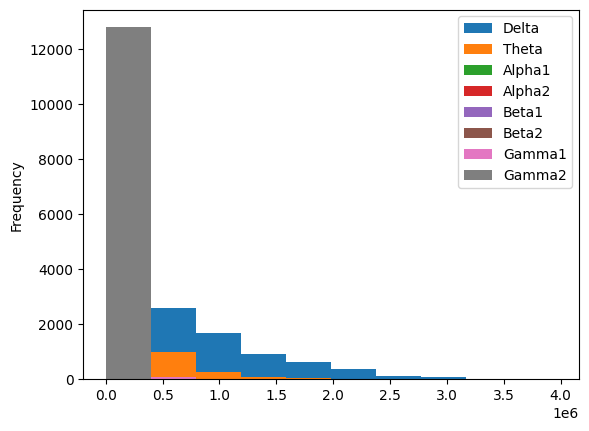

In [56]:
eeg_dataset.loc[:, 'Delta':'Gamma2'].plot(kind='hist')